In [1]:
# only adjust settings in this cell
state = 'NE'
root_name = 'Douglas'  # which county will root our district (or county_cluster==multi-district)?
k = 3                  # the state has this number of districts
deviation = 1          # use: L=ideal_population-deviation, U=ideal_population-deviation
size = 1               # size=1 for single district, size=2 for double district, ...
obj_type = 'cut_edges' # compactness objectives: cut_edges, perimeter, or polsby_popper

In [2]:
filepath = 'C:\\districting-data-2020\\'
filename = state + '_county.json'

from cluster import read_graph_from_json
G = read_graph_from_json( filepath + filename) 

In [3]:
G._k = k
G._size = size

print("State has total of k =",G._k,"districts")
print("We seek a multi-district (county cluster) of size =",G._size)

State has total of k = 3 districts
We seek a multi-district (county cluster) of size = 1


In [4]:
ideal_population = sum( G.nodes[i]['TOTPOP'] for i in G.nodes ) / G._k

# Calculate lower and upper population limits
from math import ceil, floor
G._L = ceil( ideal_population - deviation )
G._U = floor( ideal_population + deviation )

print("Single district lower population limit L =",G._L)
print("Single district upper population limit U =",G._U)

Single district lower population limit L = 653834
Single district upper population limit U = 653835


In [5]:
# Require this county be in our district/county_cluster/multi_district
G._root = G._root = [ i for i in G.nodes if G.nodes[i]['NAME20'] == root_name ][0]
print("Use",root_name,"County to be the root. In our graph, this is vertex #",G._root)

Use Douglas County to be the root. In our graph, this is vertex # 76


In [6]:
from cluster import enumerate_top_districts
districts = enumerate_top_districts( G, obj_type=obj_type, enumeration_limit=15 )

Set parameter Username
Academic license - for non-commercial use only - expires 2024-05-11
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 745 rows, 880 columns and 3738 nonzeros
Model fingerprint: 0xa8538c0f
Variable types: 463 continuous, 417 integer (417 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+06]
Presolve removed 125 rows and 138 columns
Presolve time: 0.01s
Presolved: 620 rows, 742 columns, 2925 nonzeros
Variable types: 423 continuous, 319 integer (319 binary)

Root relaxation: objective 5.471193e+00, 313 iterations, 0.01 seconds (0.01 work units)

In no particular order, the top 15 clusters are:


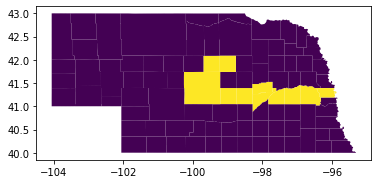

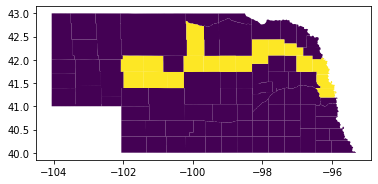

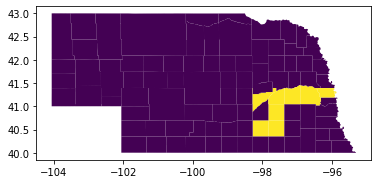

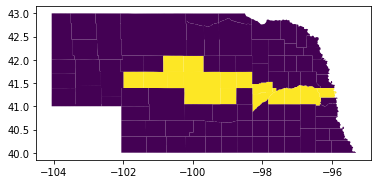

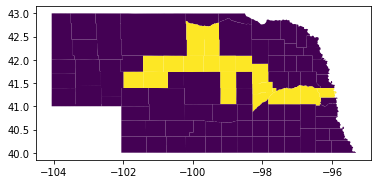

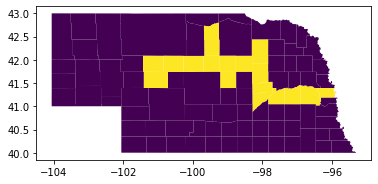

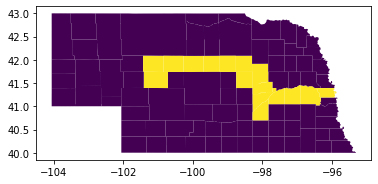

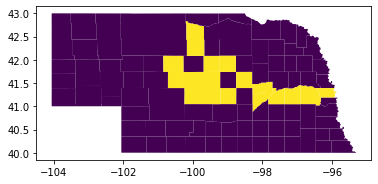

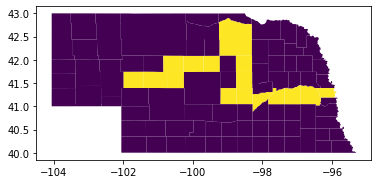

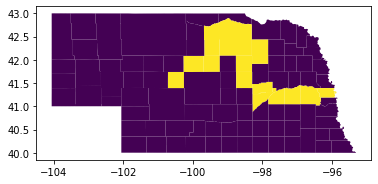

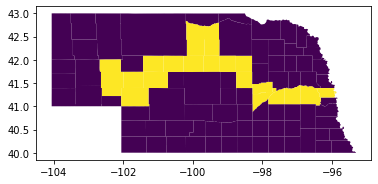

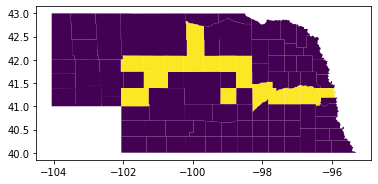

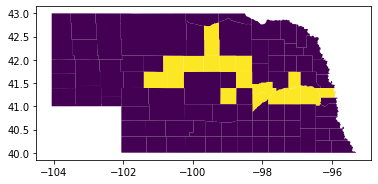

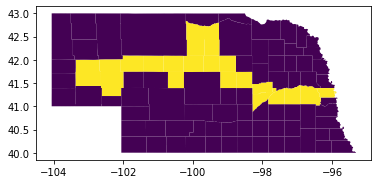

In [7]:
# Draw the districting plans
from cluster import draw_single_district
filename = state + '_county.shp'

print("In no particular order, the top 15 clusters are:")
for p in range(len(districts)):
    draw_single_district( filepath, filename, G, districts[p], zoom=False )

Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 609 rows, 702 columns and 2974 nonzeros
Model fingerprint: 0x728ec1ac
Variable types: 359 continuous, 343 integer (343 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 96 rows and 91 columns
Presolve time: 0.01s
Presolved: 513 rows, 611 columns, 2339 nonzeros
Variable types: 352 continuous, 259 integer (259 binary)

Root relaxation: objective 2.934961e+00, 155 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Ob

     0     0    6.19734    0   90          -    6.19734      -     -    0s
     0     0    6.20511    0   75          -    6.20511      -     -    0s
     0     0    6.23691    0   76          -    6.23691      -     -    0s
     0     0    6.25332    0   94          -    6.25332      -     -    0s
     0     0    6.25391    0   93          -    6.25391      -     -    0s
     0     0    6.27526    0   89          -    6.27526      -     -    0s
     0     0    6.29407    0   98          -    6.29407      -     -    0s
     0     0    6.30288    0  102          -    6.30288      -     -    0s
     0     0    6.30521    0  100          -    6.30521      -     -    0s
     0     0    6.30543    0  101          -    6.30543      -     -    0s
     0     0    6.35995    0   98          -    6.35995      -     -    0s
     0     0    6.37432    0   99          -    6.37432      -     -    0s
     0     0    6.37646    0   99          -    6.37646      -     -    0s
     0     0    6.37711  

Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 700 rows, 756 columns and 3306 nonzeros
Model fingerprint: 0x05dd94fb
Variable types: 391 continuous, 365 integer (365 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 575 rows and 475 columns
Presolve time: 0.01s

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 222, time in user-callback 0.00 sec
Set parameter LazyConstraint


CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 577 rows, 635 columns and 2729 nonzeros
Model fingerprint: 0xea64884b
Variable types: 321 continuous, 314 integer (314 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 197 rows and 107 columns
Presolve time: 0.01s
Presolved: 380 rows, 528 columns, 1871 nonzeros
Variable types: 314 continuous, 214 integer (214 binary)

Root relaxation: objective 2.934961e+00, 155 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    2.93496    0   47          -    2.93496      -     -    0s
     0     0    3.14356    0   24          - 

Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 231 rows and 107 columns
Presolve time: 0.01s
Presolved: 412 rows, 553 columns, 2009 nonzeros
Variable types: 328 continuous, 225 integer (225 binary)

Root relaxation: objective 2.934961e+00, 171 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    2.93496    0   51          -    2.93496      -     -    0s
     0     0    3.55265    0   67          -    3.55265      -     -    0s
     0     0    3.91755    0   68          -    3.91755      -     -    0s
     0     0    3.91988    0   68          -    3.91988      -     -    0s
     0     0    3.92131    0   69          -    3.92131      -     -    0s
     0     0    3.92282    0   69          -    3.92282 

Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 719 rows, 596 columns and 2908 nonzeros
Model fingerprint: 0xef344036
Variable types: 299 continuous, 297 integer (297 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 460 rows and 232 columns
Presolve time: 0.01s
Presolved: 259 rows, 364 columns, 1158 nonzeros
Variable types: 174 continuous, 190 integer (190 binary)

Root relaxation: objective 2.956502e+00, 79 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    2.95

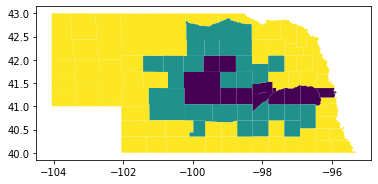

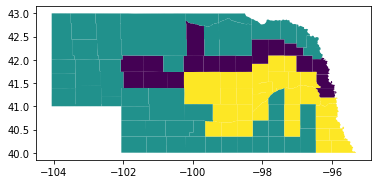

In [8]:
from cluster import draw_plan

# solve min cut edges on the k=2 subproblems that result from removing the Douglas district
for p in range(len(districts)):
    
    first_district = districts[p]
    
    nondistrict = [ i for i in G.nodes if i not in first_district ]
    H = G.subgraph(nondistrict)
    H._root = None
    H._size = 1
    H._k = 2
    H._L = G._L
    H._U = G._U
    second_districts = enumerate_top_districts( H, obj_type=obj_type, enumeration_limit=1 )
    
    if second_districts != list():
        third_district = [ i for i in G.nodes if i not in first_district+second_districts[0] ]
        plan = [ first_district, second_districts[0], third_district ]
        draw_plan( filepath, filename, G, plan )
    